In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05 * np.random.randint(100)

In [8]:
df=pd.DataFrame()

In [10]:
df["X"]=X.reshape(100)
df["y"]=y

In [12]:
df

,X,y
0,-0.125460,3.147221
1,0.450714,3.709430
2,0.231994,3.261464
3,0.098658,3.129200
4,-0.343981,3.454970
...,...,...
95,-0.006204,3.100115
96,0.022733,3.101550
97,-0.072459,3.115751
98,-0.474581,3.775681


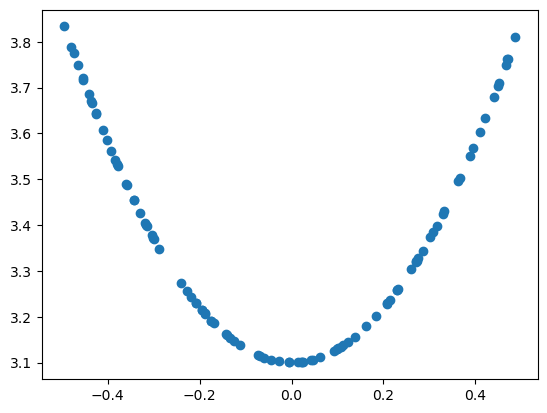

In [14]:
plt.scatter(df["X"], df["y"])

In [17]:
df["pred_1"]=df["y"].mean()

In [18]:
df["res1"]=df["y"]-df["pred_1"]

In [19]:
df

,X,y,pred_1,res1
0,-0.125460,3.147221,3.365512,-0.218292
1,0.450714,3.709430,3.365512,0.343918
2,0.231994,3.261464,3.365512,-0.104049
3,0.098658,3.129200,3.365512,-0.236312
4,-0.343981,3.454970,3.365512,0.089457
...,...,...,...,...
95,-0.006204,3.100115,3.365512,-0.265397
96,0.022733,3.101550,3.365512,-0.263962
97,-0.072459,3.115751,3.365512,-0.249762
98,-0.474581,3.775681,3.365512,0.410169


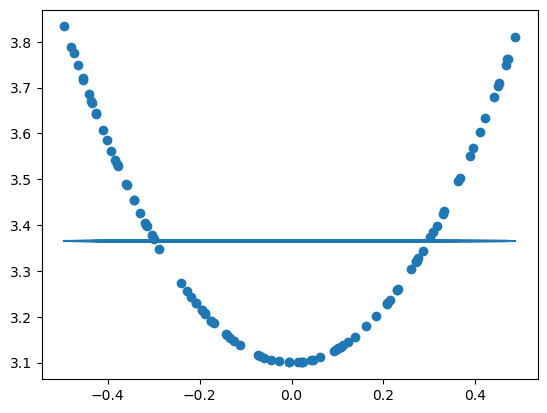

In [21]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"],df["pred_1"])

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [53]:
tree1.fit(df["X"].values.reshape(100,1),df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [29]:
from sklearn.tree import plot_tree

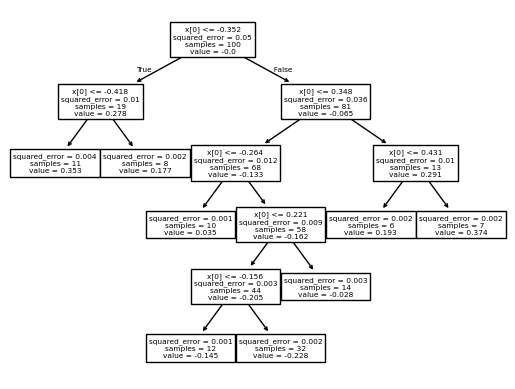

In [32]:
plot_tree(tree1)
plt.show()

In [43]:
#Generating X_test
X_test=np.linspace(-0.5,0.5, 500)

In [45]:
y_pred=3.365512 + tree1.predict(X_test.reshape(500,1))

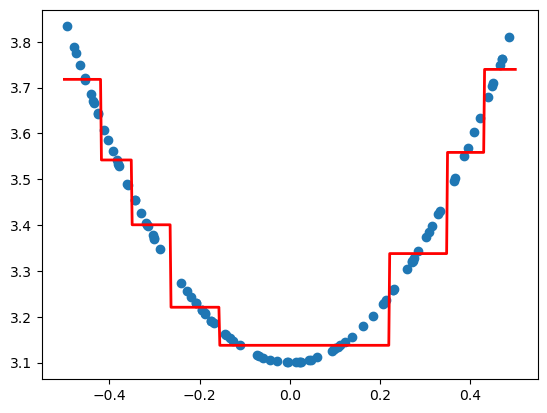

In [47]:
plt.plot(X_test, y_pred, linewidth=2, color="red")
plt.scatter(df["X"], df["y"])

In [49]:
df["pred2"]=3.365512 + tree1.predict(df["X"].values.reshape(100,1))
df

,X,y,pred_1,res1,pred2
0,-0.125460,3.147221,3.365512,-0.218292,3.137543
1,0.450714,3.709430,3.365512,0.343918,3.739856
2,0.231994,3.261464,3.365512,-0.104049,3.337788
3,0.098658,3.129200,3.365512,-0.236312,3.137543
4,-0.343981,3.454970,3.365512,0.089457,3.400643
...,...,...,...,...,...
95,-0.006204,3.100115,3.365512,-0.265397,3.137543
96,0.022733,3.101550,3.365512,-0.263962,3.137543
97,-0.072459,3.115751,3.365512,-0.249762,3.137543
98,-0.474581,3.775681,3.365512,0.410169,3.718079


In [51]:
df["res2"]=df["y"]-df["pred2"]
df

,X,y,pred_1,res1,pred2,res2
0,-0.125460,3.147221,3.365512,-0.218292,3.137543,0.009678
1,0.450714,3.709430,3.365512,0.343918,3.739856,-0.030426
2,0.231994,3.261464,3.365512,-0.104049,3.337788,-0.076324
3,0.098658,3.129200,3.365512,-0.236312,3.137543,-0.008342
4,-0.343981,3.454970,3.365512,0.089457,3.400643,0.054326
...,...,...,...,...,...,...
95,-0.006204,3.100115,3.365512,-0.265397,3.137543,-0.037427
96,0.022733,3.101550,3.365512,-0.263962,3.137543,-0.035993
97,-0.072459,3.115751,3.365512,-0.249762,3.137543,-0.021792
98,-0.474581,3.775681,3.365512,0.410169,3.718079,0.057602


In [54]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [56]:
tree2.fit(df["X"].values.reshape(100,1),df["res2"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [58]:
y_pred=3.365512 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1, tree2])

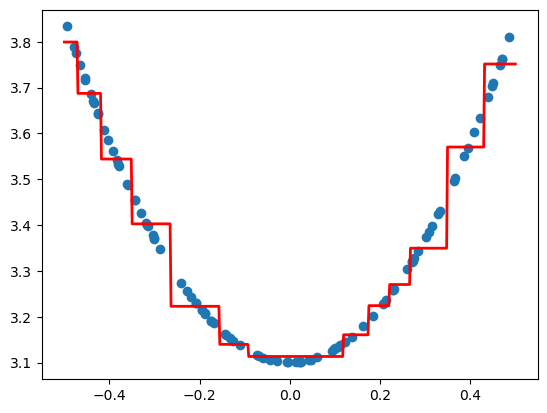

In [60]:
plt.plot(X_test, y_pred, linewidth=2, color="red")
plt.scatter(df["X"], df["y"])

In [74]:
def gradient_boost(X,y,number,lr,count=1,reg=[],foo=None):
    regs=[]
    if number== 0:
        return
    else:# do gradient boosting
        
        if count>1:
            y=y-regs[-1].predict(X)
        else:
            foo=y
            
        tree_reg=DecisionTreeRegressor(max_depth=5,random_state=42)
        tree_reg.fit(X,y)
        
        regs.append(tree_reg)
        
        x1=np.linspace(-0.5, 0.5, 500)
        y_pred=sum(lr * regressor.predict(x1.reshape(-1,1)) for regressor in regs)
        
        print(number)
        plt.figure()
        plt.plot(x1,y_pred, linewidth=2)
        plt.show(X[:,0], foo,"r. ")
        plt.show()
        
        gradient1-boost(X,y,number-1,lr,count+1,regs,foo=foo)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def gradient_boost(X, y, n_estimators, lr=1, preds=None, models=None):
    if preds is None:
        preds = np.zeros_like(y)
    if models is None:
        models = []

    for i in range(n_estimators):
        residual = y - preds  # Calculate residuals
        tree = DecisionTreeRegressor(max_depth=3)
        tree.fit(X, residual)  # Fit on residuals
        update = tree.predict(X)
        preds += lr * update
        models.append(tree)

        # Plotting each stage
        x_plot = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
        y_plot = sum(lr * m.predict(x_plot) for m in models)

        plt.figure(figsize=(6, 4))
        plt.scatter(X, y, color='red', label='Actual Data')
        plt.plot(x_plot, y_plot, color='blue', label=f'Prediction after {i+1} trees')
        plt.legend()
        plt.title(f'Gradient Boosting: Step {i+1}')
        plt.show()

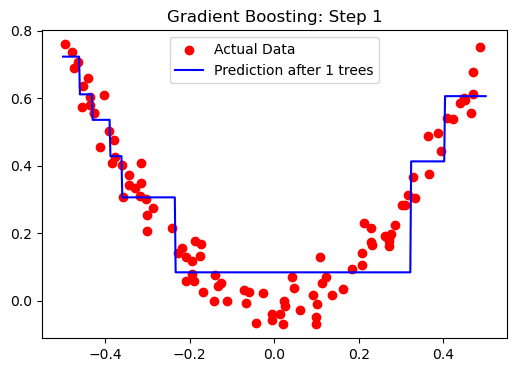

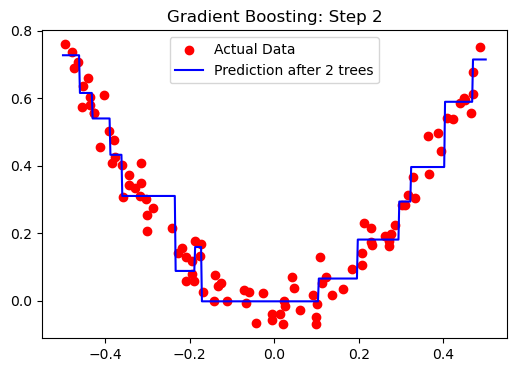

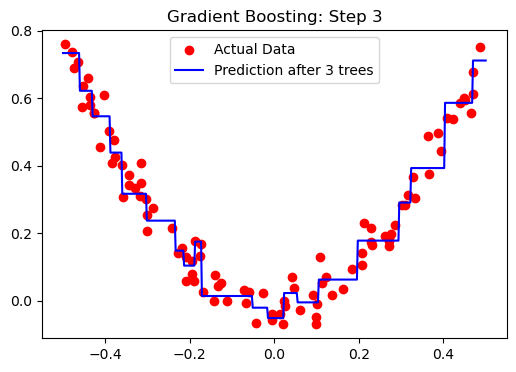

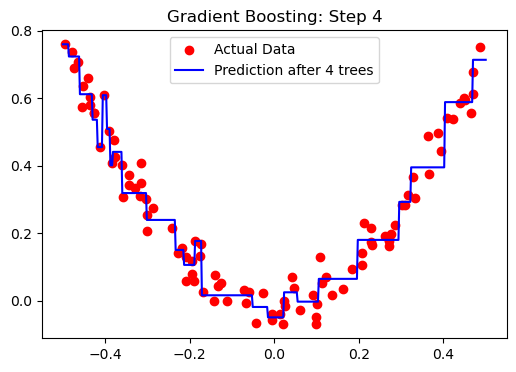

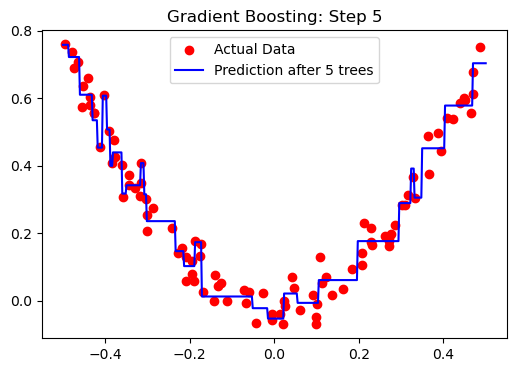

In [79]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

gradient_boost(X, y, n_estimators=5, lr=1)
